<a href="https://colab.research.google.com/github/YasineNifa/DeepLearning-Using-TF/blob/master/03_convolutional_neural_networks_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Convolutional Neural Networks and Computer Vision with TensorFlow

Computer vision is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of a self-driving car recognizing the car in front.


## Get the data
The images we're working with are from the Food101 dataset (101 different classes of food): https://www.kaggle.com/dansbecker/food-101

However we've modified it to only use two classes (pizza 🍕 & steak 🥩) using the image data modification notebook: https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb


> **IMPORTANT**


In [2]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2021-04-07 14:33:08--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.7.240, 172.217.13.240, 172.217.13.80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.7.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip.1’

pizza_steak.zip.1   100%[===================>] 104.50M   240MB/s    in 0.4s    

2021-04-07 14:33:08 (240 MB/s) - ‘pizza_steak.zip.1’ saved [109579078/109579078]



In [ ]:
!ls

__MACOSX  pizza_steak  pizza_steak.zip	sample_data


In [ ]:
!ls pizza_steak/

test  train


In [ ]:
!ls pizza_steak/test/

pizza  steak


> **IMPORTANT**

In [3]:
import os
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(dirpath, dirnames, filenames)

pizza_steak ['train', 'test'] ['.DS_Store']
pizza_steak/train ['steak', 'pizza'] ['.DS_Store']
pizza_steak/train/steak [] ['1264154.jpg', '388776.jpg', '3855584.jpg', '3438319.jpg', '187303.jpg', '3047807.jpg', '2910418.jpg', '296268.jpg', '3787809.jpg', '3130412.jpg', '3162376.jpg', '1236155.jpg', '2327701.jpg', '2036920.jpg', '379737.jpg', '2163079.jpg', '2344227.jpg', '295491.jpg', '3745515.jpg', '812163.jpg', '1100074.jpg', '1889336.jpg', '728020.jpg', '320658.jpg', '1421393.jpg', '762210.jpg', '42125.jpg', '2979061.jpg', '2544643.jpg', '2691461.jpg', '215222.jpg', '3372616.jpg', '3547166.jpg', '636594.jpg', '2172600.jpg', '3159818.jpg', '1907039.jpg', '184110.jpg', '393494.jpg', '3245622.jpg', '3531805.jpg', '2824680.jpg', '3110387.jpg', '2238681.jpg', '1618011.jpg', '2949079.jpg', '2062248.jpg', '393349.jpg', '2653594.jpg', '2547797.jpg', '616809.jpg', '1682496.jpg', '745189.jpg', '1032846.jpg', '3223400.jpg', '1563266.jpg', '368073.jpg', '2357281.jpg', '398288.jpg', '1021458.jpg

In [ ]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak/"))
num_pizza_images_train = len(os.listdir("pizza_steak/train/pizza/"))
num_steak_images_test = len(os.listdir("pizza_steak/test/steak/"))
num_pizza_images_test = len(os.listdir("pizza_steak/test/pizza/"))

num_steak_images_train, num_pizza_images_train, num_steak_images_test, num_pizza_images_test

(750, 750, 250, 250)

In [7]:
train_folder = "pizza_steak/train/"
test_folder = "pizza_steak/test/"

from os import walk
listeFichiers = []
for (repertoire, sousRepertoires, fichiers) in walk(train_folder):
 listeFichiers.extend(fichiers)

In [ ]:
listeFichiers[0]

'.DS_Store'

> **IMPORTANT**

In [4]:

# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
def view_random_image(target_dir,target_class):
  # Setup the target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

In [ ]:

#Image('pizza_steak/train/steak/1395906.jpg')


['1159797.jpg']
Image shape: (512, 512, 3)


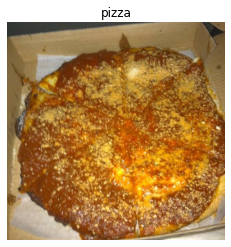

In [ ]:
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

['2137341.jpg']
Image shape: (512, 512, 3)


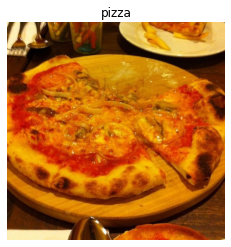

In [ ]:
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

In [ ]:
import tensorflow as tf
img_tf = tf.constant(img)

In [ ]:
img_tf.shape

TensorShape([512, 512, 3])

In [ ]:
img_tf.ndim

3

In [ ]:
tf.size(img_tf)

<tf.Tensor: shape=(), dtype=int32, numpy=786432>

> 🔑 Note: As we've discussed before, many machine learning models, including neural networks prefer the values they work with to be between 0 and 1. Knowing this, one of the most common preprocessing steps for working with images is to scale (also referred to as normalize) their pixel values by dividing the image arrays by 255. (since 255 is the maximum pixel value).

In [ ]:
# Get all the pixel values between 0 & 1 (scale/normalize the data, as neural networks love values between 0 & 1)
prefered_img = img/255
prefered_img

array([[[1.        , 0.96470588, 0.67058824],
        [0.96078431, 0.89411765, 0.61960784],
        [0.97254902, 0.90196078, 0.65882353],
        ...,
        [0.79607843, 0.61568627, 0.37254902],
        [0.6745098 , 0.49411765, 0.2627451 ],
        [0.58039216, 0.4       , 0.16862745]],

       [[1.        , 0.9372549 , 0.64705882],
        [0.98431373, 0.90980392, 0.63921569],
        [0.95686275, 0.88627451, 0.64313725],
        ...,
        [0.89411765, 0.71764706, 0.45490196],
        [0.8       , 0.62352941, 0.36862745],
        [0.72941176, 0.54901961, 0.30588235]],

       [[1.        , 0.92941176, 0.64705882],
        [0.98823529, 0.91372549, 0.64705882],
        [0.92156863, 0.84313725, 0.60392157],
        ...,
        [0.95686275, 0.78431373, 0.49803922],
        [0.91372549, 0.74117647, 0.45490196],
        [0.8745098 , 0.70196078, 0.42352941]],

       ...,

       [[0.99215686, 0.92156863, 0.67058824],
        [0.98823529, 0.91764706, 0.6745098 ],
        [0.97647059, 0

array([[[1.        , 0.96470588, 0.67058824],
        [0.96078431, 0.89411765, 0.61960784],
        [0.97254902, 0.90196078, 0.65882353],
        ...,
        [0.79607843, 0.61568627, 0.37254902],
        [0.6745098 , 0.49411765, 0.2627451 ],
        [0.58039216, 0.4       , 0.16862745]],

       [[1.        , 0.9372549 , 0.64705882],
        [0.98431373, 0.90980392, 0.63921569],
        [0.95686275, 0.88627451, 0.64313725],
        ...,
        [0.89411765, 0.71764706, 0.45490196],
        [0.8       , 0.62352941, 0.36862745],
        [0.72941176, 0.54901961, 0.30588235]],

       [[1.        , 0.92941176, 0.64705882],
        [0.98823529, 0.91372549, 0.64705882],
        [0.92156863, 0.84313725, 0.60392157],
        ...,
        [0.95686275, 0.78431373, 0.49803922],
        [0.91372549, 0.74117647, 0.45490196],
        [0.8745098 , 0.70196078, 0.42352941]],

       ...,

       [[0.99215686, 0.92156863, 0.67058824],
        [0.98823529, 0.91764706, 0.6745098 ],
        [0.97647059, 0

## An end-to-end example¶
Let's build a convolutional neural network to find patterns in our images, more specifically we a need way to:

* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator #Generate batches of tensor image data with real-time data augmentation.


# set the seed to have the same data for differents experiments

# Preprocess data (get all of pixels value between 0 and 1 which we call scalling or normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

#paths
train_folder = "pizza_steak/train/"
test_folder = "pizza_steak/test/"

#Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_folder,
                                               batch_size=32,
                                               target_size=(224,224),#images size
                                               class_mode="binary",# binary classification
                                               seed = 42)

valid_data = valid_datagen.flow_from_directory(directory=test_folder,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

#Build a CNN model (like the Tiny VGG)
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3,
                         activation="relu",
                         input_shape=(224, 224, 3)),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="valid"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile CNN
model_1.compile(loss="binary_crossentropy",#usually used for binary classification
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"]
                )


# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 20s 204ms/step - loss: 0.6885 - accuracy: 0.6073 - val_loss: 0.4074 - val_accuracy: 0.8420
Epoch 2/5
47/47 [==============================] - 9s 187ms/step - loss: 0.4479 - accuracy: 0.8157 - val_loss: 0.3446 - val_accuracy: 0.8500
Epoch 3/5
47/47 [==============================] - 9s 187ms/step - loss: 0.3976 - accuracy: 0.8425 - val_loss: 0.3442 - val_accuracy: 0.8800
Epoch 4/5
47/47 [==============================] - 9s 187ms/step - loss: 0.4055 - accuracy: 0.8394 - val_loss: 0.3301 - val_accuracy: 0.8860
Epoch 5/5
47/47 [==============================] - 9s 186ms/step - loss: 0.3649 - accuracy: 0.8292 - val_loss: 0.3060 - val_accuracy: 0.8780


In [ ]:

# Get a model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow Playground model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")                         
])

# Compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 181ms/step - loss: 1.3184 - accuracy: 0.5167 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 8s 174ms/step - loss: 0.6932 - accuracy: 0.5010 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 8s 174ms/step - loss: 0.6931 - accuracy: 0.5045 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 8s 177ms/step - loss: 0.6932 - accuracy: 0.4888 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 8s 175ms/step - loss: 0.6932 - accuracy: 0.4995 - val_loss: 0.6932 - val_accuracy: 0.5000


In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 602116    
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create the model (same as above but let's step it up a notch)
model_3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")                            
])

# Compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 179ms/step - loss: 5.1515 - accuracy: 0.5230 - val_loss: 0.6859 - val_accuracy: 0.7440
Epoch 2/5
47/47 [==============================] - 8s 171ms/step - loss: 0.7066 - accuracy: 0.7277 - val_loss: 0.6685 - val_accuracy: 0.6840
Epoch 3/5
47/47 [==============================] - 8s 175ms/step - loss: 0.6495 - accuracy: 0.7294 - val_loss: 0.5579 - val_accuracy: 0.7180
Epoch 4/5
47/47 [==============================] - 8s 177ms/step - loss: 0.5521 - accuracy: 0.7447 - val_loss: 0.4565 - val_accuracy: 0.7820
Epoch 5/5
47/47 [==============================] - 8s 176ms/step - loss: 0.4388 - accuracy: 0.8105 - val_loss: 0.4366 - val_accuracy: 0.7980


In [ ]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               15052900  
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 101       
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


> 🔑 **Note**: You can think of trainable parameters as **patterns a model can learn from data.** Intuitively, you might think more is better. And in lots of cases, it is. But in this case, the difference here is the two different styles of model we're using. Where a series of dense layers has a number of different learnable parameters connected to each other and hence a higher number of possible learnable patterns, **a convolutional neural network seeks to sort out and learn the most important patterns in an image.** So even though these are less learnable parameters in our convolutional neural network, these are often more helpful in dechiphering between different **features** in an image.

## Binary Classification: Let's break it down¶
* Become one with the data (visualize, visualize, visualize)
* Preprocess the data (prepared it for our model, the main step here was scaling/normalizing & turning our data into batches)
* Create a model (start with a baseline)
* Fit the model
* Evaluate the model
* Adjust different parameters and improve the model (try to beat our baseline)
* Repeat until satisfied (experiment, experiment, experiment)

['3745515.jpg']
Image shape: (512, 384, 3)
['904938.jpg']
Image shape: (511, 512, 3)


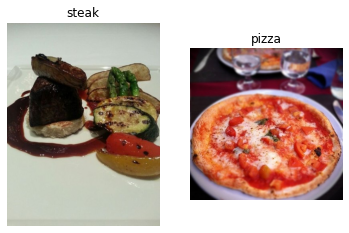

In [ ]:
# Visualize data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

In [18]:
train_folder

'pizza_steak/train/'

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen  = ImageDataGenerator(rescale=1/255.)

> **IMPORTANT**

In [6]:
train_folder = "pizza_steak/train/"
test_folder = "pizza_steak/test/"
# turn data into batches
train_data = train_datagen.flow_from_directory(directory=train_folder,
                                               target_size=(244,244),
                                               batch_size = 32,
                                               class_mode='binary',
                                               )

test_data = test_datagen.flow_from_directory(directory=test_folder,
                                               target_size=(244,244),
                                               batch_size = 32,
                                               class_mode='binary',
                                               )

Found 1500 images belonging to 2 classes.


NameError: ignored

In [21]:
# Get a sample of a train data batch
images, labels = train_data.next()
len(images), len(labels)

(32, 32)

In [22]:
# How many batches are there?
len(train_data)

47

In [25]:
#Get the two first images
images.shape

(32, 244, 244, 3)

In [26]:
# View the first batch of labels
labels

array([1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1.,
       1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1.],
      dtype=float32)

## 3. Create a CNN model (start with a baseline)
A baseline is a relatively simple model or existing result that you setup when beginning a machine learning experiment and then as you keep experimenting, you try to beat the baseline.

> 🔑 Note: In deep learning, there is almost an infinite amount of architectures you could create. So one of the best ways to get started is to start with something simple and see if it works on your data and then introduce complexity as required (e.g. look at which current model is performing best in the field for your problem).

In [28]:
model_4 = tf.keras.Sequential([
                               tf.keras.layers.Conv2D(filters=10,# the number of sliding windows going accross an input (higher = more complex model)
                               kernel_size = (3,3),#the size of the sliding window going accross an input
                               strides=(1,1),#size of the step the sliding window takes across an input
                               padding="valid",#if same, output shape is same as input shape, if valid output get compressed
                               activation="relu",
                               input_shape=(244,244,3)#input layer (input shape)
                                                      ),
                               
                               tf.keras.layers.Conv2D(10,3,activation="relu"),
                               tf.keras.layers.Conv2D(10,3,activation="relu"),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(1,activation="sigmoid")# output layer (working with binary classification so only 1 output neuron)
])

In [29]:
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [30]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 242, 242, 10)      280       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 240, 240, 10)      910       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 238, 238, 10)      910       
_________________________________________________________________
flatten_3 (Flatten)          (None, 566440)            0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 566441    
Total params: 568,541
Trainable params: 568,541
Non-trainable params: 0
_________________________________________________________________


In [33]:
history_4 = model_4.fit(train_data,
            epochs = 5,
            steps_per_epoch=len(train_data),
            validation_data = test_data,
            validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 9s 201ms/step - loss: 0.0241 - accuracy: 0.9947 - val_loss: 0.6057 - val_accuracy: 0.7780
Epoch 2/5
47/47 [==============================] - 9s 196ms/step - loss: 0.0112 - accuracy: 1.0000 - val_loss: 0.5898 - val_accuracy: 0.8120
Epoch 3/5
47/47 [==============================] - 9s 195ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.6854 - val_accuracy: 0.8180
Epoch 4/5
47/47 [==============================] - 9s 196ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.7130 - val_accuracy: 0.8080
Epoch 5/5
47/47 [==============================] - 9s 198ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.7945 - val_accuracy: 0.8080


## Evaluating our model

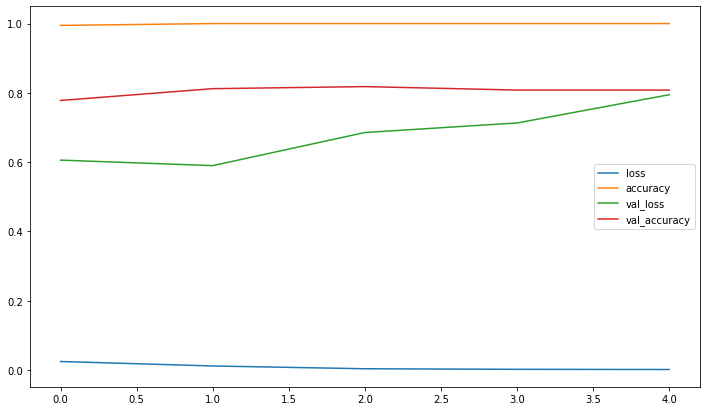

In [35]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(12,7))

In [36]:
history_4.history

{'accuracy': [0.9946666955947876, 1.0, 1.0, 1.0, 1.0],
 'loss': [0.024144919589161873,
  0.0112382210791111,
  0.00318022514693439,
  0.001549183507449925,
  0.0010250275954604149],
 'val_accuracy': [0.777999997138977,
  0.8119999766349792,
  0.8180000185966492,
  0.8080000281333923,
  0.8080000281333923],
 'val_loss': [0.6056743264198303,
  0.5897680521011353,
  0.6853945255279541,
  0.712986409664154,
  0.7945405840873718]}

> **IMPORTANT**

In [7]:
# Plot the validation and training curves separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) # how many epochs did we run for?

  # Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend();

> **🔑 Note**: When a model's **validation loss starts to increase**, it's likely that the model is **overfitting** the training dataset. This means, it's learning the patterns in the training dataset too well and thus the model's ability to generalize to unseen data will be diminished

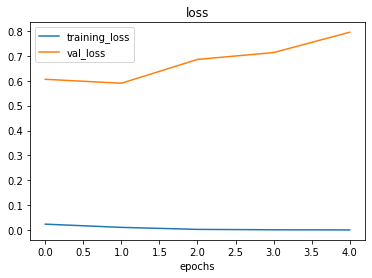

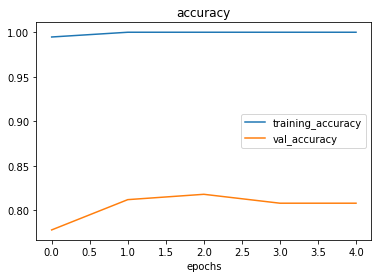

In [38]:
plot_loss_curves(history_4)

> **🔑 Note**: Ideally the two loss curves (training and validation) will be very similar to each other (training loss and validation loss decreasing at similar rates), when there are large differences your model may be **overfitting**.

## 6. Adjust the model parameters¶
Fitting a machine learning model comes in 3 steps:

* Create a baseline
* Beat the baseline by overfitting a larger model
* Reduce overfitting
Ways to induce overfitting:

* Increase the number of conv layers
* Increase the number of conv filters
* Add another dense layer to the output of our flattened layer
Reduce overfitting:

* Add data augmentation
* Add regularization layers (such as MaxPool2D)
* Add more data...
>**🔑 Note**: Reducing overfitting is also known as **regularization**.

In [8]:
model_5 = tf.keras.Sequential([
                               tf.keras.layers.Conv2D(10,3,activation="relu", input_shape=(244,244,3)),
                               tf.keras.layers.MaxPool2D(pool_size=2),
                               tf.keras.layers.Conv2D(10,3,activation="relu"),
                               tf.keras.layers.MaxPool2D(),
                               tf.keras.layers.Conv2D(10,3,activation="relu"),
                               tf.keras.layers.MaxPool2D(),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(1,activation="sigmoid")
])

model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])



In [15]:
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 13s 247ms/step - loss: 0.6837 - accuracy: 0.5499 - val_loss: 0.5269 - val_accuracy: 0.7640
Epoch 2/5
47/47 [==============================] - 11s 232ms/step - loss: 0.5168 - accuracy: 0.7570 - val_loss: 0.4126 - val_accuracy: 0.8320
Epoch 3/5
47/47 [==============================] - 11s 235ms/step - loss: 0.4314 - accuracy: 0.8118 - val_loss: 0.3802 - val_accuracy: 0.8580
Epoch 4/5
47/47 [==============================] - 11s 235ms/step - loss: 0.4080 - accuracy: 0.8286 - val_loss: 0.3552 - val_accuracy: 0.8620
Epoch 5/5
47/47 [==============================] - 11s 236ms/step - loss: 0.4068 - accuracy: 0.8231 - val_loss: 0.3433 - val_accuracy: 0.8720


In [16]:
model_5.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 242, 242, 10)      280       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 121, 121, 10)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 119, 119, 10)      910       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 59, 59, 10)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 57, 57, 10)        910       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 28, 28, 10)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 7840)             

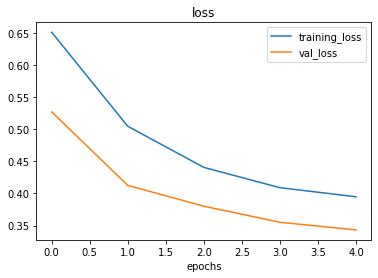

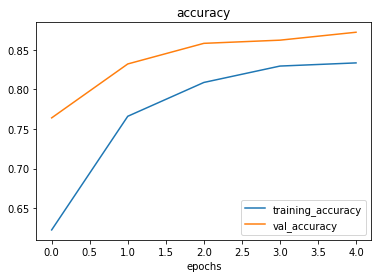

In [18]:
plot_loss_curves(history_5)

## Data Augmentation

In [9]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255., 
                                             rotation_range=0.2,#How much do u want to rotate the image
                                             shear_range=0.2,# how much do you want to shear an image?
                                             zoom_range=0.2, # zoom in randomly on an image
                                             width_shift_range=0.2, # move your iamge around on the x-axis
                                             height_shift_range=0.2,#move your image around on the y-axis
                                             horizontal_flip=True# do you want to flip and image? 
                                             )

train_datagen = ImageDataGenerator(rescale=1/255.)
# Create ImageDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)

> 🤔 Question: What is data augmentation?

Data augmentation is the process of altering our training data, leading it to have more diversity and in turn allowing our models to learn more generalizable (hopefully) patterns. Altering might mean adjuting the rotation of an image, flipping it, cropping it or something similar.

In [10]:
IMG_SIZE = (224, 224)

# Import data and augment it from training directory
print("Augmented training data:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_folder,
                                                                   target_size=IMG_SIZE,
                                                                   class_mode='binary',
                                                                   batch_size=32,
                                                                   shuffle=False)

# Create non-augmented train data batches
print("Non-augmented training data:")
train_data = train_datagen.flow_from_directory(train_folder,
                                               target_size=IMG_SIZE,
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False)

# Create non-augmented test data batches
print("Non-augmented test data:")
test_data = test_datagen.flow_from_directory(directory = test_folder,
                                             target_size=IMG_SIZE,
                                             batch_size=32,
                                             class_mode="binary")

Augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented test data:
Found 500 images belonging to 2 classes.


> 🔑 Note: Data augmentation is usually only performed on the training data. Using ImageDataGenerator built-in data augmentation parameters our images are left as they are in the directories but are modified as they're loaded into the model.

Finally... let's visualize some augmented data!!!

In [11]:
# Get sample data batches


images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

showing image number: 10


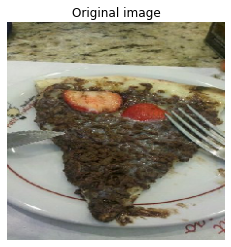

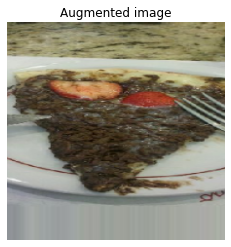

In [12]:
import random
random_number = random.randint(0, 32) # our batch sizes are 32...
print(f"showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

In [13]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,Flatten,Dense,MaxPool2D
from tensorflow.keras.optimizers import Adam

In [14]:
model_6 = Sequential([Conv2D(10,3,activation="relu"),
                      MaxPool2D(pool_size=2),
                      Conv2D(10,3,activation="relu"),
                      MaxPool2D(),
                      Conv2D(10,3,activation="relu"),
                      Flatten(),
                      Dense(1,activation="sigmoid")])

model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

history_6 = model_6.fit(train_data_augmented,epochs=5,
            steps_per_epoch=len(train_data_augmented),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 22s 460ms/step - loss: 0.8696 - accuracy: 0.6138 - val_loss: 0.6971 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 21s 449ms/step - loss: 0.6916 - accuracy: 0.5605 - val_loss: 0.6561 - val_accuracy: 0.5760
Epoch 3/5
47/47 [==============================] - 21s 450ms/step - loss: 0.6656 - accuracy: 0.5705 - val_loss: 0.5442 - val_accuracy: 0.6680
Epoch 4/5
47/47 [==============================] - 21s 449ms/step - loss: 0.5912 - accuracy: 0.6734 - val_loss: 0.4075 - val_accuracy: 0.8320
Epoch 5/5
47/47 [==============================] - 21s 448ms/step - loss: 0.5445 - accuracy: 0.7441 - val_loss: 0.4174 - val_accuracy: 0.8420


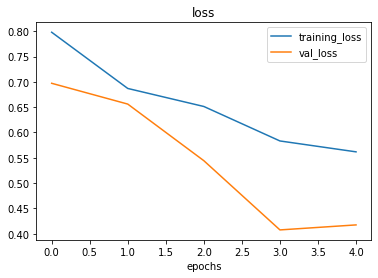

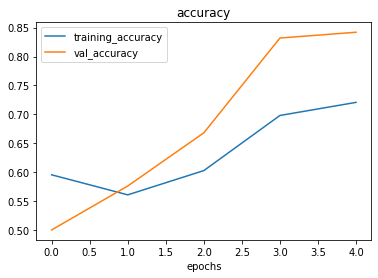

In [15]:
plot_loss_curves(history_6)

## 7. Repeat until satisfied
Since we've already beaten our baseline, there are a few things we could try to contine to improve our model:

* Increase the number of model layers (e.g. add more Conv2D/MaxPool2D layers)
* Increase the number of filters in each convolutional layer (e.g. from 10 to 32 or even 64)
* Train for longer (more epochs)
* Find an ideal learning rate
* Get more data (give the model more opportunities to learn)
* Use transfer learning to leverage what another image model has learn and adjust it for our own use case
> 🛠 Practice: Recreate the model on the CNN explainer website (same as model_1) and see how it performs on the augmented shuffled training data.

In [16]:
# Create a function to import and image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor and reshapes it 
  to (img_shape, img_shape, colour_channels).
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])
  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

--2021-04-07 14:41:12--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.04s   

2021-04-07 14:41:12 (52.6 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



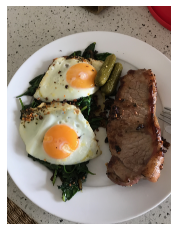

In [18]:
# View our example image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg 
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [19]:
# Load in and preprocess our custom image
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [21]:
steak.ndim

3

In [22]:
steak.shape

TensorShape([224, 224, 3])

In [24]:
pred = model_6.predict(tf.expand_dims(steak,axis=0))
pred

array([[0.84889275]], dtype=float32)

In [23]:
model_6.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, None, None, 10)    280       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, None, None, 10)    0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, None, None, 10)    910       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, None, None, 10)    0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, None, None, 10)    910       
_________________________________________________________________
flatten_2 (Flatten)          (None, None)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                

In [26]:
class_names=['pizza','steak']
print(class_names)

['pizza', 'steak']


In [27]:
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [31]:
class_names[int(tf.round(pred))]

'steak'

In [29]:
pred

array([[0.84889275]], dtype=float32)

In [34]:
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model
  and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

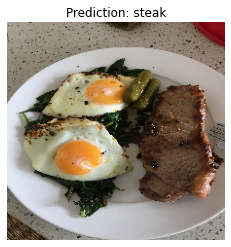

In [36]:
# Test our model on a custom image
pred_and_plot(model_6, "03-steak.jpeg")

--2021-04-07 14:49:27--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg.3’

03-pizza-dad.jpeg.3 100%[===================>]   2.74M  --.-KB/s    in 0.03s   

2021-04-07 14:49:27 (94.9 MB/s) - ‘03-pizza-dad.jpeg.3’ saved [2874848/2874848]



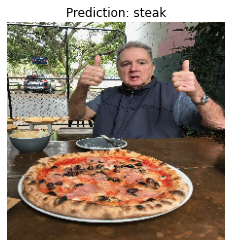

In [40]:
# Download another test custom image and make a prediction on it
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_6, "03-pizza-dad.jpeg")

## Multi-class image classification

We've just been through a bunch of the following steps with a binary classification problem (pizza vs. steak), now we're going to step things up a notch with 10 classes of food (multi-class classification).

* Become one with the data
* Preprocess the data (get it ready for a model)
* Create a model (start with a baseline)
* Fit the model (overfit it to make sure it works)
* Evaluate the model
* Adjust differet hyperparameters and improve the model (try to beat baseline/reduce overfitting)
* Repeat until satisfied

In [41]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
zip_ref = zipfile.ZipFile('10_food_classes_all_data.zip','r')
zip_ref.extractall()
zip_ref.close()

--2021-04-07 15:19:53--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.73.208, 142.250.65.80, 172.253.122.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.73.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   110MB/s    in 4.5s    

2021-04-07 15:19:57 (110 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [44]:
import os

for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}.")

There are 2 directories and 0 images in 10_food_classes_all_data.
There are 10 directories and 0 images in 10_food_classes_all_data/train.
There are 0 directories and 750 images in 10_food_classes_all_data/train/hamburger.
There are 0 directories and 750 images in 10_food_classes_all_data/train/sushi.
There are 0 directories and 750 images in 10_food_classes_all_data/train/ramen.
There are 0 directories and 750 images in 10_food_classes_all_data/train/chicken_curry.
There are 0 directories and 750 images in 10_food_classes_all_data/train/steak.
There are 0 directories and 750 images in 10_food_classes_all_data/train/ice_cream.
There are 0 directories and 750 images in 10_food_classes_all_data/train/grilled_salmon.
There are 0 directories and 750 images in 10_food_classes_all_data/train/chicken_wings.
There are 0 directories and 750 images in 10_food_classes_all_data/train/pizza.
There are 0 directories and 750 images in 10_food_classes_all_data/train/fried_rice.
There are 10 directorie

In [45]:
# Setup the train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [47]:
# Let's get the class names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

['2659722.jpg']
Image shape: (512, 512, 3)


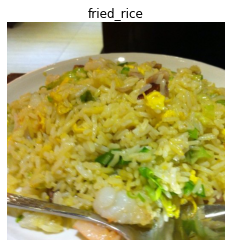

In [48]:
# Visualize, visualize, visualize
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
def view_random_image(target_dir,target_class):
  # Setup the target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

img = view_random_image(target_dir = train_dir,
                        target_class = random.choice(class_names))

In [49]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#Rescale
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen  = ImageDataGenerator(rescale=1/255.)

IMG_SIZE = (224,224)
#Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=IMG_SIZE,
                                               batch_size=32,
                                               class_mode='categorical')

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                               target_size=IMG_SIZE,
                                               batch_size=32,
                                               class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [50]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D,MaxPool2D,Flatten
from tensorflow.keras.optimizers import Adam

In [51]:
model_8 = Sequential([Conv2D(10,3,input_shape=(224,224,3), activation="relu"),
                      MaxPool2D(pool_size=2),
                      Conv2D(10,3,activation="relu"),
                      MaxPool2D(),
                      Conv2D(10,3,activation="relu"),
                      Flatten(),
                      Dense(10,activation="softmax")])# changed to have 10 output neurons and use the softmax activation function


model_8.compile(loss="categorical_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])

In [54]:
history_8 = model_8.fit(train_data,epochs = 5,
            steps_per_epoch = len(train_data),
            validation_data=test_data,
            validation_steps= len(test_data))

Epoch 1/5
235/235 [==============================] - 41s 175ms/step - loss: 0.1250 - accuracy: 0.9720 - val_loss: 4.1721 - val_accuracy: 0.2624
Epoch 2/5
235/235 [==============================] - 41s 175ms/step - loss: 0.0606 - accuracy: 0.9876 - val_loss: 4.8914 - val_accuracy: 0.2624
Epoch 3/5
235/235 [==============================] - 41s 174ms/step - loss: 0.0387 - accuracy: 0.9931 - val_loss: 5.5153 - val_accuracy: 0.2468
Epoch 4/5
235/235 [==============================] - 41s 174ms/step - loss: 0.0202 - accuracy: 0.9973 - val_loss: 5.8848 - val_accuracy: 0.2484
Epoch 5/5
235/235 [==============================] - 41s 175ms/step - loss: 0.0249 - accuracy: 0.9943 - val_loss: 6.1832 - val_accuracy: 0.2536


In [56]:
model_8.evaluate(test_data)

79/79 [==============================] - 10s 127ms/step - loss: 6.1832 - accuracy: 0.2536


[6.183184623718262, 0.25360000133514404]

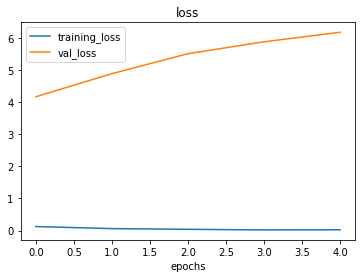

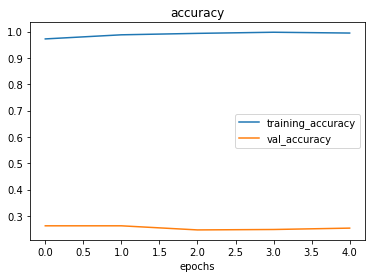

In [55]:
# Plot the validation and training curves separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) # how many epochs did we run for?

  # Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend();

plot_loss_curves(history_8)

### Adjust the model hyperparameters (to beat the baseline/reduce overfitting)¶
Due to its performance on the training data, it's clear our model is learning something...

However, it's not generalizing well to unseen data (overfitting).

So, let's try and fix overfitting by...

* Get more data - having more data gives a model more opportunity to learn diverse patterns...
* Simpliy the model - if our current model is overfitting the data, it may be too complicated of a model, one way to simplify a model is to: reduce # of layers or reduce # hidden units in layers
* Use data augmentation - data augmentaiton manipulates the training data in such a way to add more diversity to it (without altering the original data)
* Use transfer learning - transfer learning leverages the patterns another model has learned on similar data to your own and allows you to use those patterns on your own dataset

In [57]:
# remove one conv layer and one maxpool
model_9 = Sequential([Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
                      MaxPool2D(),
                      Conv2D(10,3,activation="relu"),
                      MaxPool2D(),
                      Flatten(),
                      Dense(10,activation="softmax")
                      ])

model_9.compile(loss="categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [60]:
# Augmented data
train_datagen_augmented = ImageDataGenerator(rescale=1/255., 
                                             rotation_range=0.2,#How much do u want to rotate the image
                                             shear_range=0.2,# how much do you want to shear an image?
                                             zoom_range=0.2, # zoom in randomly on an image
                                             width_shift_range=0.2, # move your iamge around on the x-axis
                                             height_shift_range=0.2,#move your image around on the y-axis
                                             horizontal_flip=True)# do you want to flip and image? )

train_data_augmented = train_datagen_augmented.flow_from_directory(directory=train_dir,
                                                                   target_size=(224,224),
                                                                   batch_size=32,
                                                                   class_mode='categorical'
                                                                   )
test_datagen = ImageDataGenerator(rescale=1/255.)
test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                            class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [61]:
history_9 = model_9.fit(train_data_augmented,
                        epochs = 5,
                        steps_per_epoch = len(train_data_augmented),
                        validation_data = test_data
                      )

Epoch 1/5
235/235 [==============================] - 105s 445ms/step - loss: 2.4536 - accuracy: 0.1574 - val_loss: 2.0408 - val_accuracy: 0.2756
Epoch 2/5
235/235 [==============================] - 104s 442ms/step - loss: 2.0891 - accuracy: 0.2595 - val_loss: 1.9773 - val_accuracy: 0.3128
Epoch 3/5
235/235 [==============================] - 104s 441ms/step - loss: 2.0338 - accuracy: 0.2855 - val_loss: 1.8687 - val_accuracy: 0.3656
Epoch 4/5
235/235 [==============================] - 104s 442ms/step - loss: 1.9846 - accuracy: 0.3125 - val_loss: 1.8349 - val_accuracy: 0.3620
Epoch 5/5
235/235 [==============================] - 104s 442ms/step - loss: 1.9501 - accuracy: 0.3240 - val_loss: 1.8181 - val_accuracy: 0.3676


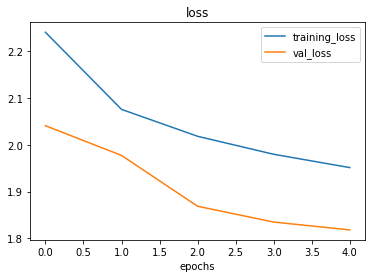

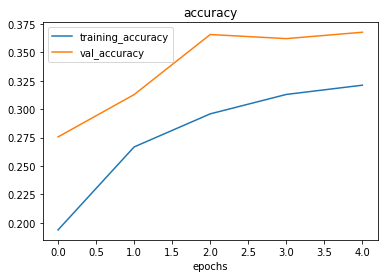

In [62]:
plot_loss_curves(history_9)